In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import math


In [2]:
font = {'size'   : 10, 'family':'STIXGeneral'}
axislabelfontsize='small'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [3]:
LCDM_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   'h':0.6821,
                   'omega_b':0.02253,
                   'omega_cdm':0.1177,
                   'A_s':2.216e-9, #caught a typo
                   'n_s':0.9686,
                   'tau_reio':0.085,
                   'm_ncdm': 0.06,
                   'N_ncdm':1, 
                   'N_ur':2.0328,
                   #'Omega_Lambda': 6.878622e-01,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   #'YHe':0.246,
                   # other output and precision parameters
                   'l_max_scalars':2508,
                   'non linear':'HMcode',
                   'P_k_max_h/Mpc':100,
                   'z_max_pk':2.}

In [4]:
LCDM = Class()
LCDM.set(LCDM_settings)
LCDM.compute()

In [5]:
EDE = Class()
#  Use best-fit params  of Smith+ :
EDE.set({'h': .7219})
EDE.set({'f_scf': 3.98e+26,
         'm_scf': 5.31e-28,
         'thetai_scf': 2.83,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': 0.02253,
         'omega_cdm': 0.1306,
         'm_ncdm': 0.06,
         'tau_reio': 0.072})
EDE.set({'non linear':'HMCODE','N_ncdm':1, 'N_ur':2.0328, 'Omega_Lambda':0.0, 'Omega_fld':0, 'Omega_scf':-1, 'n_scf':3, 'CC_scf':1, 'scf_parameters':'1, 1, 1, 1, 1, 0.0', 'scf_tuning_index':3, 'attractor_ic_scf':'no', 'output':'tCl pCl lCl mPk', 'lensing':'yes', 'l_max_scalars':2508, 'P_k_max_h/Mpc':30,'z_max_pk':2.})
EDE.compute()

In [6]:
# Cell
# note Cl^gamma-gamma = 1/4 * [(l+2)!/(l-2)!] C_l^phi-phi.

clLCDM=LCDM.lensed_cl()
clEDE=EDE.lensed_cl()
clell = clLCDM.get("ell")
clTTLCDM = clLCDM.get("tt")
clTTEDE = clEDE.get("tt")
clppLCDM = clLCDM.get("pp")
clppEDE = clEDE.get("pp")
clEELCDM = clLCDM.get("ee")
clEEEDE = clEDE.get("ee")
clTELCDM = clLCDM.get("te")
clTEEDE = clEDE.get("te")



DellTTLCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clTTLCDM)/(2*3.14)
DellTTEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clTTEDE)/(2*3.14)
DellppLCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clppLCDM)/(2*3.14)
DellppEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clppEDE)/(2*3.14)
DellTELCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clTELCDM)/(2*3.14)
DellTEEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clTEEDE)/(2*3.14)
DellEELCDM = 1e12*np.multiply(np.multiply(clell,clell+1),clEELCDM)/(2*3.14)
DellEEEDE = 1e12*np.multiply(np.multiply(clell,clell+1),clEEEDE)/(2*3.14)

In [7]:
# note Cl^gamma-gamma = 1/4 * [(l+2)!/(l-2)!] C_l^phi-phi.
# Note: [(l+2)!/(l-2)!]= (l+2)(l+1)(l)(l-1)
cellgg = np.zeros(len(clell)-1)
DellggLCDM = np.zeros(len(clell)-1)
DellggEDE= np.zeros(len(clell)-1)

for i in range(2,len(clell)-1):
    cellgg[i]=clell[i]
    prefactor=0.25*1e12*(clell[i]+2)*(clell[i]+1)*clell[i]*(clell[i]-1)
    DellggLCDM[i] = 0.25*1e12*(math.factorial(clell[i]+2)/math.factorial(clell[i]-2))*clell[i]*(clell[i]+1)*clppLCDM[i]/(2*3.14)
    DellggEDE[i] = 0.25*1e12*(math.factorial(clell[i]+2)/math.factorial(clell[i]-2))*clell[i]*(clell[i]+1)*clppEDE[i]/(2*3.14)
 

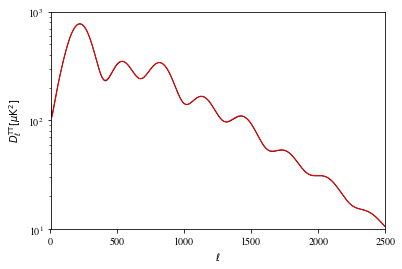

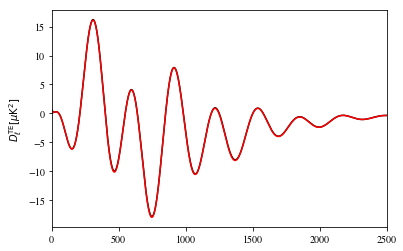

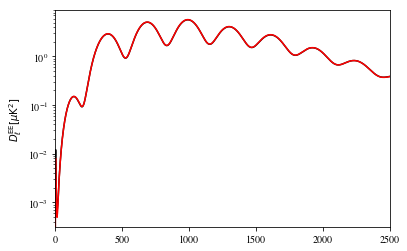

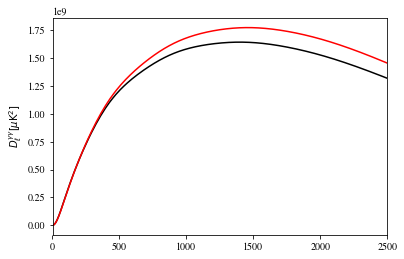

In [9]:
# TT, EE, TE, lensing
plt.figure()
plt.plot(clell,DellTTLCDM,c='k',lw=1.)
plt.plot(clell,DellTTEDE,c='r',lw=1.)
plt.xscale('linear')
plt.yscale('log')
plt.xlim([2,2500])
plt.ylim([1e1,1e3])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell ^{\rm TT} [\mu {\rm K}^2 ]$')
#plt.savefig('DellTT.pdf')
#plt.clf()

plt.figure()
plt.plot(clell,DellTELCDM,c='k')
plt.plot(clell,DellTEEDE,c='r')
plt.xscale('linear')
plt.yscale('linear')
plt.xlim([2,2500])
plt.ylabel(r'$D_\ell ^{\rm TE} [\mu {\rm K}^2 ]$')
#plt.savefig('DellTE.pdf')
#plt.clf()

plt.figure()
plt.plot(clell,DellEELCDM,c='k')
plt.plot(clell,DellEEEDE,c='r')
plt.xlim([2,2500])
plt.xscale('linear')
plt.yscale('log')
plt.ylabel(r'$D_\ell ^{\rm EE} [\mu {\rm K}^2 ]$')
#plt.savefig('DellEE.pdf')
#plt.clf()

plt.figure()
plt.ylabel(r'$D_\ell ^{\gamma \gamma} [\mu {\rm K}^2 ]$')
plt.plot(cellgg,DellggLCDM,c='k')
plt.plot(cellgg,DellggEDE,c='r')
plt.xlim([2,2500])
plt.xscale('linear')
#plt.yscale('log')
#plt.savefig('Dellgg.pdf')
#plt.clf()


